In [3]:
import gensim
import pickle
model = gensim.models.KeyedVectors.load_word2vec_format('model.vec', binary=False)

with open('V-title.pkl', 'rb') as f:
    classes = pickle.load(f)
print(classes)
model.most_similar(positive=[classes["chicken_quesadilla"]])

{'apple_pie': array([-2.85123494e-02,  1.85491443e-02,  1.85747407e-02, -5.88449389e-02,
       -6.76569855e-03,  6.94132298e-02,  6.08405657e-02,  3.11763454e-02,
        1.73486859e-01, -2.01996826e-02, -4.56647910e-02, -9.87503752e-02,
        7.26531669e-02, -3.10578407e-03,  3.73480953e-02,  5.47043700e-03,
       -1.03888758e-01,  2.09796857e-02, -9.05877352e-02,  3.86161022e-02,
       -4.92791981e-02,  2.80857310e-02,  1.81853324e-02, -3.04226540e-02,
        2.75240168e-02,  6.81547001e-02, -1.57528952e-01,  3.65398936e-02,
       -5.62401965e-06, -2.76377797e-02, -8.59399699e-03,  5.05709052e-02,
       -2.37958431e-02, -2.04374064e-02, -7.24469647e-02,  2.16731783e-02,
        5.67687266e-02, -9.72453579e-02, -6.19687364e-02, -1.04888946e-01,
        2.02120095e-02, -3.71371559e-03, -8.24748725e-02,  7.97279179e-02,
        1.08816206e-01, -8.94974917e-03, -3.49519216e-03, -1.93490535e-02,
       -1.24328531e-01, -1.28952608e-01,  7.92562738e-02,  8.75326712e-03,
        4.0

[('トルティーヤ', 0.770610511302948),
 ('トルティーヤチップス', 0.7480831146240234),
 ('トルティーア', 0.7435395121574402),
 ('トルティージャ', 0.7434958815574646),
 ('チキン', 0.7282850742340088),
 ('トルティアチップス', 0.7056125998497009),
 ('チーズ', 0.7021705508232117),
 ('アボチーズ', 0.6880435943603516),
 ('ハルミチーズ', 0.6873425841331482),
 ('トルティア', 0.6752452850341797)]

In [7]:
import numpy as np
import matplotlib.pyplot as plt
A = []
for key, v in classes.items():
    A.append(v)
A = np.array(A)
print(A.shape)

(101, 256)


(256,)


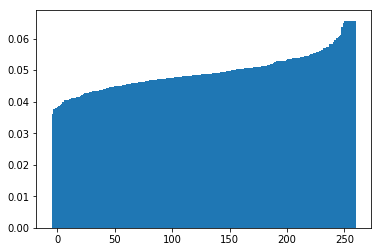

In [9]:
C = np.var(A, axis=0)
C = np.sqrt(C)
print(C.shape)
C.sort()
plt.bar(np.arange(256), C, width=10)
plt.show()

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=256)
pca.fit(A)
D = pca.components_
print(D.shape)

(101, 256)


In [11]:
D = np.sum(A, axis=0) # 因子負荷量
print(D.shape)

(256,)


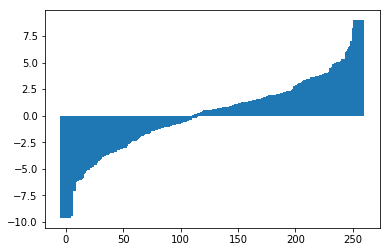

In [12]:
D.sort()
plt.bar(np.arange(256), D, width=10)
plt.show()

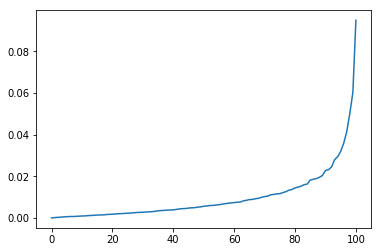

1.0000000000000002
0.0948922149516114


In [16]:
# なんで要素数100なん
E = pca.explained_variance_ratio_
E.sort()
plt.plot(E)
plt.show()
print(np.sum(E))
print(E.max())